In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [12]:
df = pd.read_csv('diabetes.csv')

In [46]:
data.shape

(81, 9)

In [79]:
df.loc[:, 'Age'] += 15

In [110]:
data=df[df.Age>65]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,75,1
8,2,197,70,45,543,30.5,0.158,78,1
9,8,125,96,0,0,0.0,0.232,79,1
12,10,139,80,0,0,27.1,1.441,82,0
13,1,189,60,23,846,30.1,0.398,84,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,77,1
759,6,190,92,0,0,35.5,0.278,91,1
761,9,170,74,31,0,44.0,0.403,68,1
763,10,101,76,48,180,32.9,0.171,88,0


In [111]:
data.shape

(194, 9)

In [112]:
print('Dataset :',df.shape)
df.info()
df[0:10]

Dataset : (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,75,1
1,1,85,66,29,0,26.6,0.351,56,0
2,8,183,64,0,0,23.3,0.672,57,1
3,1,89,66,23,94,28.1,0.167,46,0
4,0,137,40,35,168,43.1,2.288,58,1
5,5,116,74,0,0,25.6,0.201,55,0
6,3,78,50,32,88,31.0,0.248,51,1
7,10,115,0,0,0,35.3,0.134,54,0
8,2,197,70,45,543,30.5,0.158,78,1
9,8,125,96,0,0,0.0,0.232,79,1


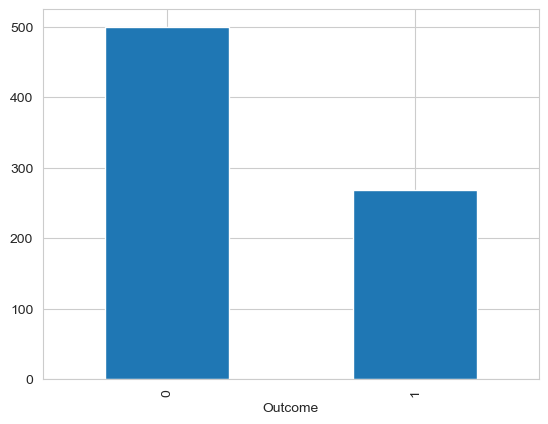

In [113]:
# Distribution of Outcome
df.Outcome.value_counts()[0:30].plot(kind='bar')
plt.show()

C:\Users\Welcome\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Welcome\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


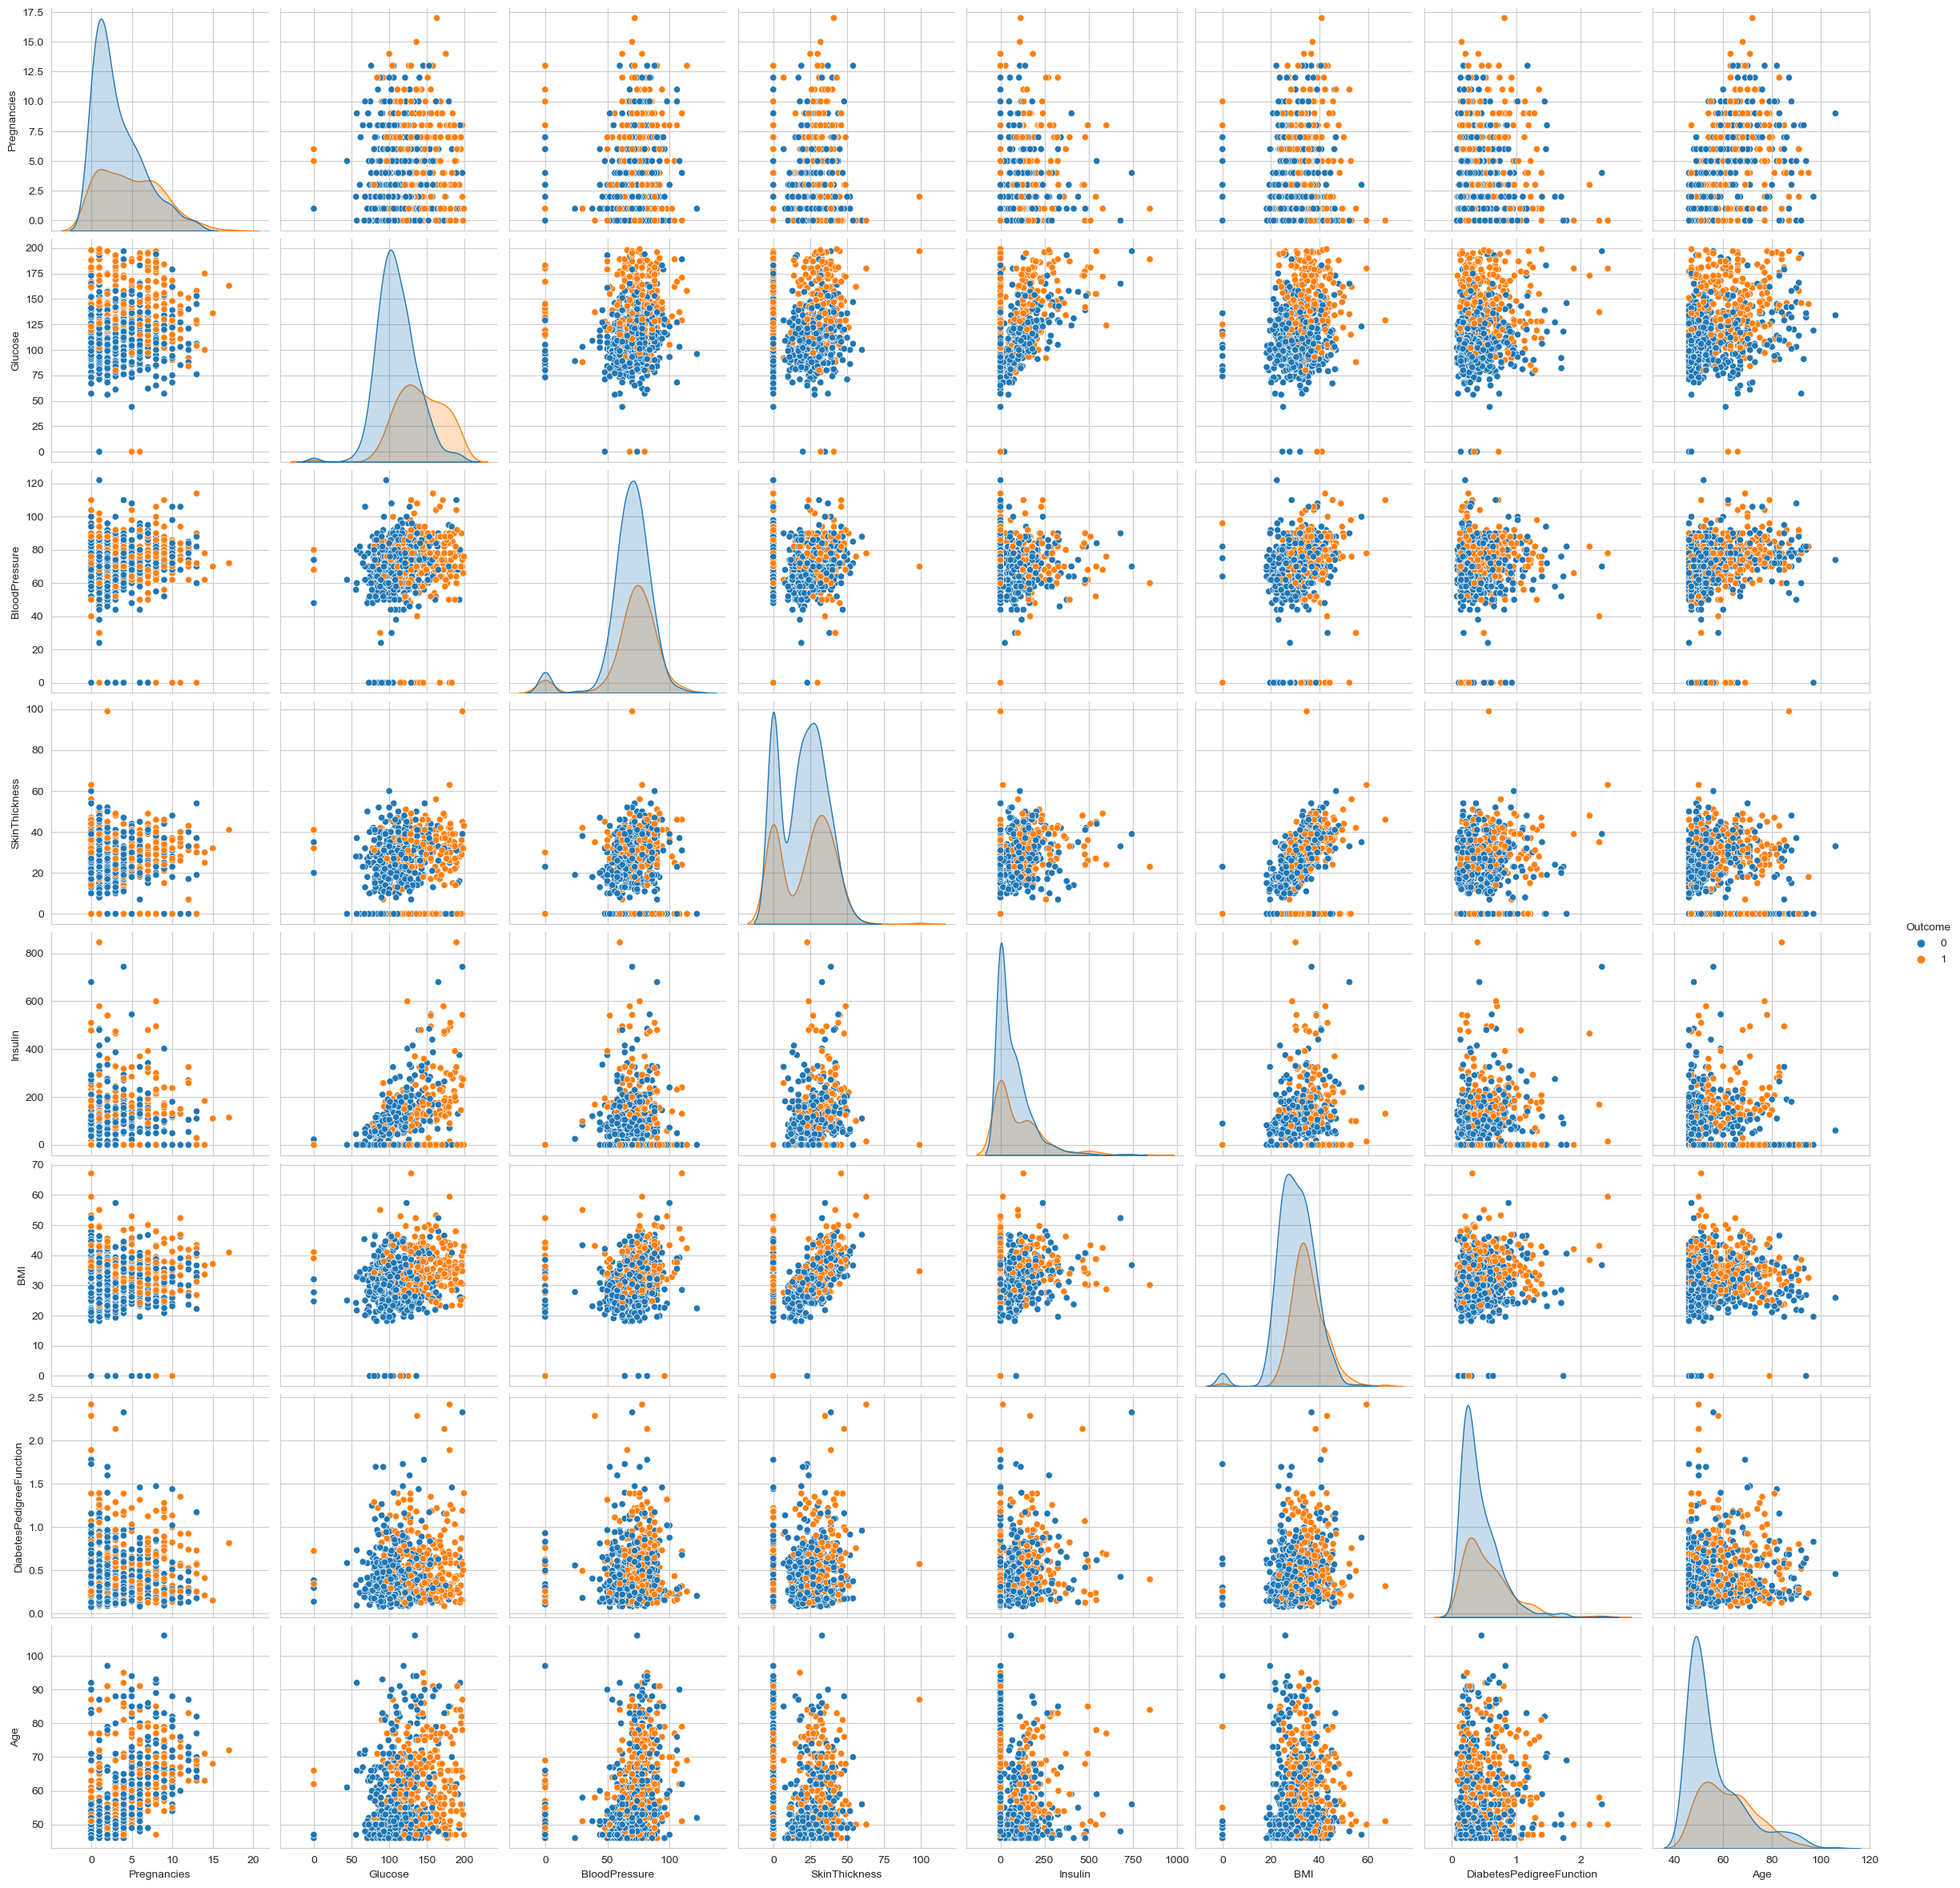

In [114]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Outcome",size=3);
plt.show()

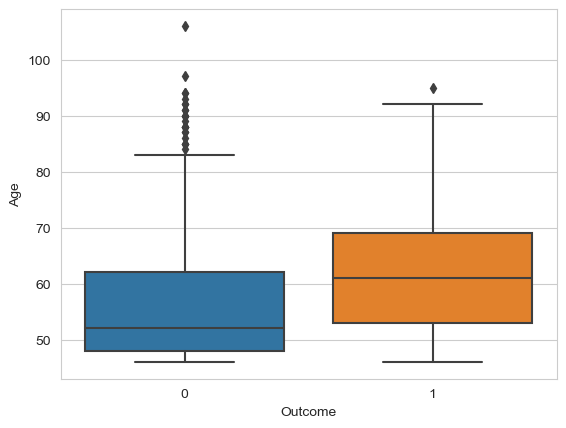

In [115]:
#plot outcome by age
sns.boxplot(x="Outcome",y="Age",data=df)
plt.show()

In [116]:
from sklearn.model_selection import train_test_split
Y = df['Outcome']
X = df.drop(columns=['Outcome'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [117]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (691, 8)
Y train shape:  (691,)
X test shape:  (77, 8)
Y test shape:  (77,)


In [118]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

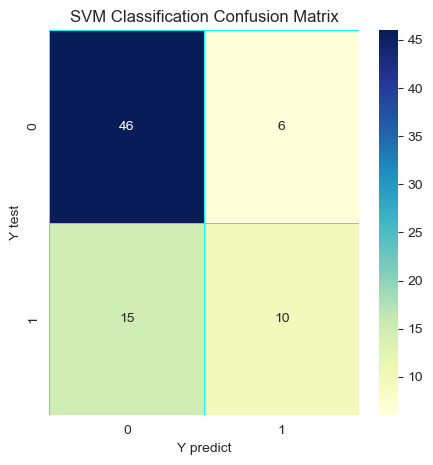

In [119]:
# The confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [120]:
# Test score
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

0.7272727272727273


In [121]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

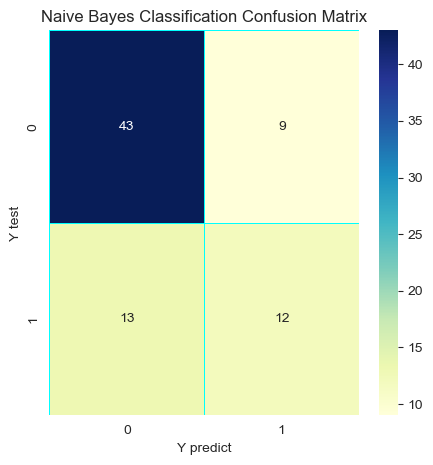

In [122]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [123]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.7142857142857143


In [127]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

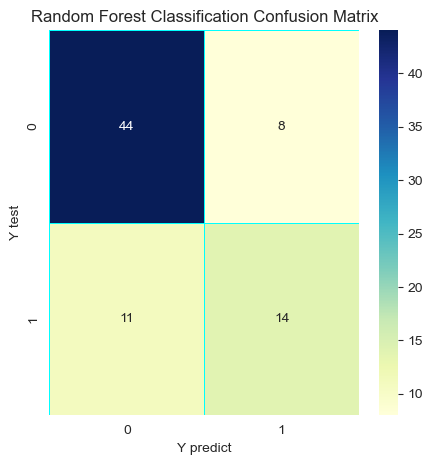

In [128]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [129]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.7532467532467533


In [140]:
Testscores = pd.Series([score_svmcla, score_nbcla, score_rfcla], 
                        index=['Support Vector Machine Score', 'Naive Bayes Score','Random forest']) 
print(Testscores)

Support Vector Machine Score    0.727273
Naive Bayes Score               0.714286
Random forest                   0.753247
dtype: float64
